Install OpenCv (dlib library can be used too)

In [1]:
!pip install opencv-python opencv-python-headless

Pre Trained Face detection Model Haar Cascade Download

In [2]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml

--2024-12-08 12:25:29--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-12-08 12:25:30--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2024

Uploading The images which needed to detect faces

In [14]:
from google.colab import files

# Upload images (Can add multiple pics at once)
uploaded = files.upload()

# List uploaded files
print(uploaded)

Saving images (1).jpeg to images (1).jpeg
{'images (1).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x12\x13\x12\x15\x16\x15\x17\x18\x1b\x18\x18\x17\x17\x17\x15\x18\x17\x17\x17\x17\x15\x18\x17\x17\x18\x18\x17\x18\x1d( \x18\x1a%\x1b\x17\x18!1!%)+/..\x18\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x17-\x1f\x1e%----------.+------------+-+---+-------+---+-------\xff\xc0\x00\x11\x08\x00\xfb\x00\xc9\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x07\x00\x08\xff\xc4\x00D\x10\x00\x01\x03\x02\x03\x04\x08\x05\x01\x06\x04\x03\t\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121\x05AQa\x06\x13"q\x81\x91\xa1\xf0\x072\xb1\xc1\xd1\xe1\x14#BRr\xf13b\x82\xa2S\xb2\xe2\x17$4CDT\x83\x92\xd3\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x02\x04\x05\xff\xc4\x00%\x11\x01\x01\x00\x03\x00\x02\x01

Creating a folder store processed Images

In [15]:
import os

output_folder = "processed_images"
os.makedirs(output_folder, exist_ok=True)

Implementing Face Detection

Grayscale Conversion:
   Convert images to grayscale to reduce complexity while preserving essential information.

Normalization:
   Scale pixel values to a standard range, typically 0 to 1, to improve convergence during model training.

Resizing:
   Resize the cropped face images to a uniform size, such as 96x96 pixels, to ensure consistent input for the model.

Histogram Equalization:
   Enhance the contrast of the images to make facial features more distinguishable.



In [16]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os

# Load the Haar cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Check if the Haar cascade is loaded properly
if face_cascade.empty():
    raise Exception("Haar cascade file not loaded properly!")

# Process each uploaded image
for file_name in uploaded.keys():

    # Read the image
    image = cv2.imread(file_name)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

#Saving Processed Images
    output_path = os.path.join(output_folder, f"processed_{file_name}")
    if cv2.imwrite(output_path, image):
        print(f"Processed and saved: {output_path}")
    else:
        print(f"Failed to save the processed image: {output_path}")

Processed and saved: processed_images/processed_images (1).jpeg


View the processed Images (Optional)

Processed images saved in: processed_images
Processed files: ['processed_images (1).jpeg']
Displaying: processed_images (1).jpeg


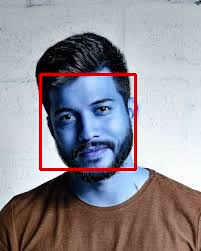

In [17]:
# List all processed images
processed_files = os.listdir(output_folder)
print("Processed images saved in:", output_folder)
print("Processed files:", processed_files)

# Display one of the processed images (optional)
for file_name in processed_files:
    file_path = os.path.join(output_folder, file_name)
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for correct display
    print(f"Displaying: {file_name}")
    cv2_imshow(image)

Download The Processed Image Folder (Optional)

In [ ]:
from google.colab import files

# Download individual files manually
for file_name in processed_files:
    file_path = os.path.join(output_folder, file_name)
    files.download(file_path)

downloading as a zip file

In [ ]:
# Download processed images as a ZIP file
# shutil.make_archive(output_folder, 'zip', output_folder)
# files.download(f"{output_folder}.zip")

Saving Processed Images

In [11]:
# Save the processed image to the folder

#    output_path = os.path.join(output_folder, f"processed_{file_name}")
#    if cv2.imwrite(output_path, image):
#        print(f"Processed and saved: {output_path}")
#    else:
#        print(f"Failed to save the processed image: {output_path}")

IndentationError: unexpected indent (<ipython-input-11-e01d899ba98e>, line 3)